In [1]:
from carculator_truck import *

In [2]:
from carculator_truck import __file__
__file__

'/Users/romain/Github/carculator_truck/carculator_truck/__init__.py'

In [3]:
tip = TruckInputParameters()
#tip.stochastic(5)
tip.static()
dcts, array = fill_xarray_from_input_parameters(
    tip,
    scope={"year": [2020, 2030, 2040, 2050]}
)
tm = TruckModel(array, cycle='Regional delivery',)
tm.set_all()

Finding solutions for trucks...
Regional delivery driving cycle is selected. 
Vehicles will be designed to achieve a minimal range of 400 km.


'-' vehicle with driving mass superior to the permissible gross weight.
'/' vehicle not available for the specified year.
+-------------------+-----+-----+------+------+------+------+------+
| Payload (in tons) | 18t | 26t | 3.5t | 32t  | 40t  | 60t  | 7.5t |
+-------------------+-----+-----+------+------+------+------+------+
|     BEV, 2020     | 3.2 | 6.3 | 0.8  | 10.3 | 10.3 | 19.3 | 1.8  |
|     BEV, 2030     | 3.2 | 6.3 | 0.8  | 10.3 | 10.3 | 19.3 | 1.8  |
|     BEV, 2040     | 3.2 | 6.3 | 0.8  | 10.3 | 10.3 | 19.3 | 1.8  |
|     BEV, 2050     | 3.2 | 6.3 | 0.8  | 10.3 | 10.3 | 19.3 | 1.8  |
|     FCEV, 2020    | 3.2 | 6.3 | 0.8  | 10.3 | 10.3 | 19.3 | 1.8  |
|     FCEV, 2030    | 3.2 | 6.3 | 0.8  | 10.3 | 10.3 | 19.3 | 1.8  |
|     FCEV, 2040    | 3.2 | 6.3 | 0.8  | 10.3 | 10.3 | 19.3 | 1.8  |
|     FCEV, 2050    | 3.2 | 6.3 | 0.8  | 10.

In [4]:
ic = InventoryTruck(tm)

No input found for ('treatment of used bus',) and exclude () in the A matrix.
****************** IMPORTANT BACKGROUND PARAMETERS ******************
 * The functional unit is: vkm.
 * The background prospective scenario is: SSP2-NPi.
 * The country of use is: CH.
 * Power and energy batteries produced in CN using ['NMC-622', 'NMC-955'] chemistry/ies
	 * between 2020 and 2029, % of non-hydro renew.: 12, hydro: 61, nuclear: 20.
	 * between 2030 and 2039, % of non-hydro renew.: 25, hydro: 58, nuclear: 7.
	 * between 2040 and 2049, % of non-hydro renew.: 30, hydro: 56, nuclear: 2.
	 * between 2050 and 2059, % of non-hydro renew.: 33, hydro: 54, nuclear: 1.
hydrogen - smr - natural gas is completed by hydrogen - electrolysis - PEM.
 	 * in 2020 _________________________________________ 1.0%
 	 * in 2030 _________________________________________ 1.0%
 	 * in 2040 _________________________________________ 1.0%
 	 * in 2050 _________________________________________ 1.0%
 * methane is completed 

In [6]:
res = ic.calculate_impacts()

Calculating impacts
0% [##############################] 100% | ETA: 00:00:00
Total time elapsed: 00:00:02


Text(0.5, 1.0, 'Parameters value increased by 10%')

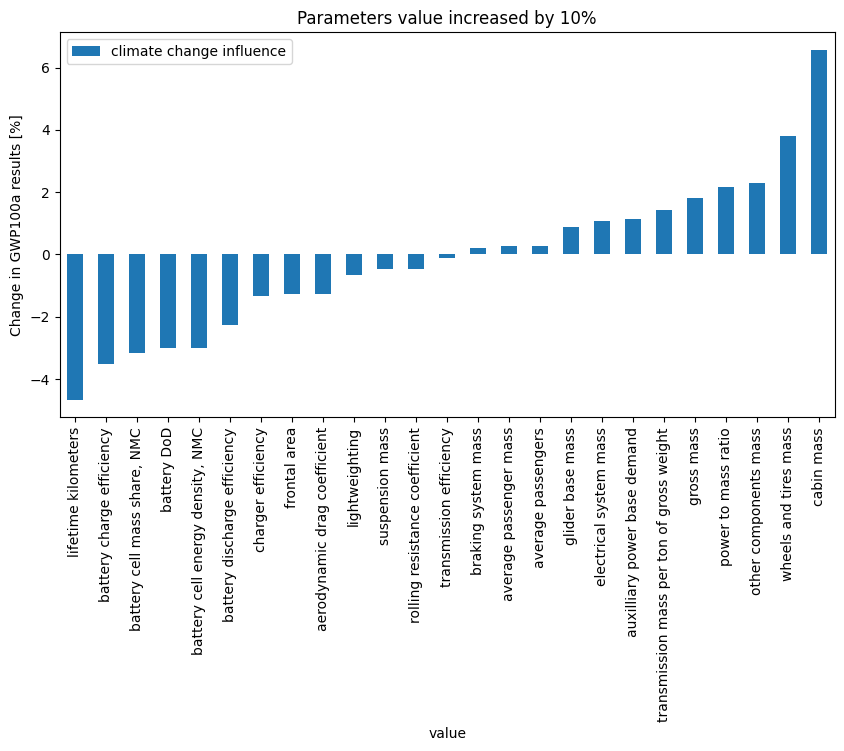

In [7]:
import matplotlib.pyplot as plt
df = res.sel(impact_category="climate change", powertrain="BEV", size="26t", year=2020)\
    .to_dataframe("climate change influence")
df = df.loc[(df["climate change influence"] > 1.001)|(df["climate change influence"] < 1),:]
df["climate change influence"] -= 1 
df["climate change influence"] *= 100 
df = df.sort_values("climate change influence", ascending=True)
df.plot(y="climate change influence", kind="bar", figsize=(10,5))
plt.ylabel("Change in GWP100a results [%]")
plt.title("Parameters value increased by 10%")

In [5]:
import numpy as np
_o = lambda x: np.nan_to_num(1)
((
            -1
            / (
                    24
                    * (
                            2100
                            / _o(tm.array.sel(parameter="electric energy stored"))
                    )
                    * tm.array.sel(parameter="kilometers per year")
            )
        ) * (tm.array.sel(parameter="electricity consumption") > 0)).shape

(1, 1, 1, 89)

In [11]:
res=ic.calculate_impacts()

Calculating impacts
0% [##############################] 100% | ETA: 00:00:00
Total time elapsed: 00:00:07


In [12]:
df_full = res.sel(value=0, year=2020, impact_category=[
    'climate change',
    #'climate change w bio CO2',
    'acidification: terrestrial',
    #'ecotoxicity: freshwater',
    #'ecotoxicity: marine',
    #'ecotoxicity: terrestrial',
    #'energy resources: non-renewable, fossil',
    'eutrophication: freshwater',
    #'eutrophication: marine',
    #'human toxicity: carcinogenic',
    'human toxicity: non-carcinogenic',
    'ionising radiation potential (IRP)',
    #'agricultural land occupation (LOP)',
    'material resources: metals/minerals',
    #'ozone depletion',
    'particulate matter formation',
    'photochemical oxidant formation: human health',
    #'photochemical oxidant formation: terrestrial ecosystems',
    #'water consumption potential',
    #'Human noise impacts',
    #'non-renewable energy',
    #'renewable energy',
    'total energy'
]).to_dataframe("x").reset_index()

/var/folders/cn/pys1j9rn0y7djkhv3hfdtrs00000gn/T/ipykernel_18062/4014338594.py:31: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(pad=1.5)


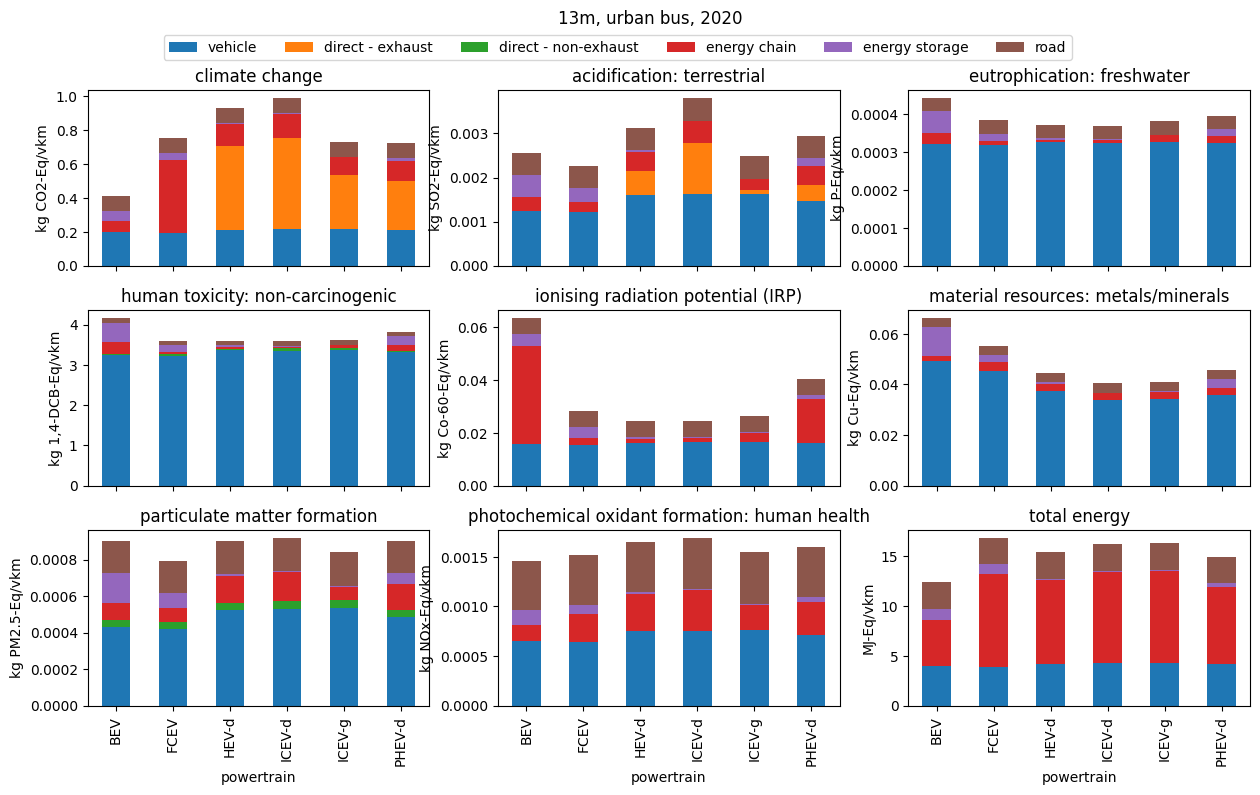

In [13]:
import matplotlib.pyplot as plt
import numpy as np

fig, axs = plt.subplots(figsize=(15, 8), 
                        sharex=True,
                        nrows=3, ncols=3,
                        gridspec_kw=dict(hspace=0.25)
                       ) 


targets = zip([x for x in df_full["impact_category"].unique()], axs.flatten())

for i, (key, ax) in enumerate(targets):
    df = res.sel(impact_category=key,
            year=2030,
            size="18t",
            value=0).to_dataframe("val").unstack()["val"]
    
    df["vehicle"] = df[["powertrain", "glider", "EoL", "maintenance"]].sum(axis=1)
    #df["direct"] = df[["direct - exhaust", "direct - non-exhaust"]].sum(axis=1)
    
    df = df[["vehicle", "direct - exhaust", "direct - non-exhaust","energy chain", "energy storage", "road"]]
    
    df.plot(ax=ax, kind="bar", stacked=True)

    ax.set_title(key)
    ax.set_ylabel(ic.impact_categories[key]["unit"] + "/" + ic.func_unit)
    ax.legend().remove()
    
plt.legend(ncol=6, bbox_to_anchor=(0.5, 3.85))    
plt.tight_layout(pad=1.5)
plt.suptitle("13m, urban bus, 2020")
plt.show()

/var/folders/cn/pys1j9rn0y7djkhv3hfdtrs00000gn/T/ipykernel_18062/1545988205.py:32: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(pad=1.5)


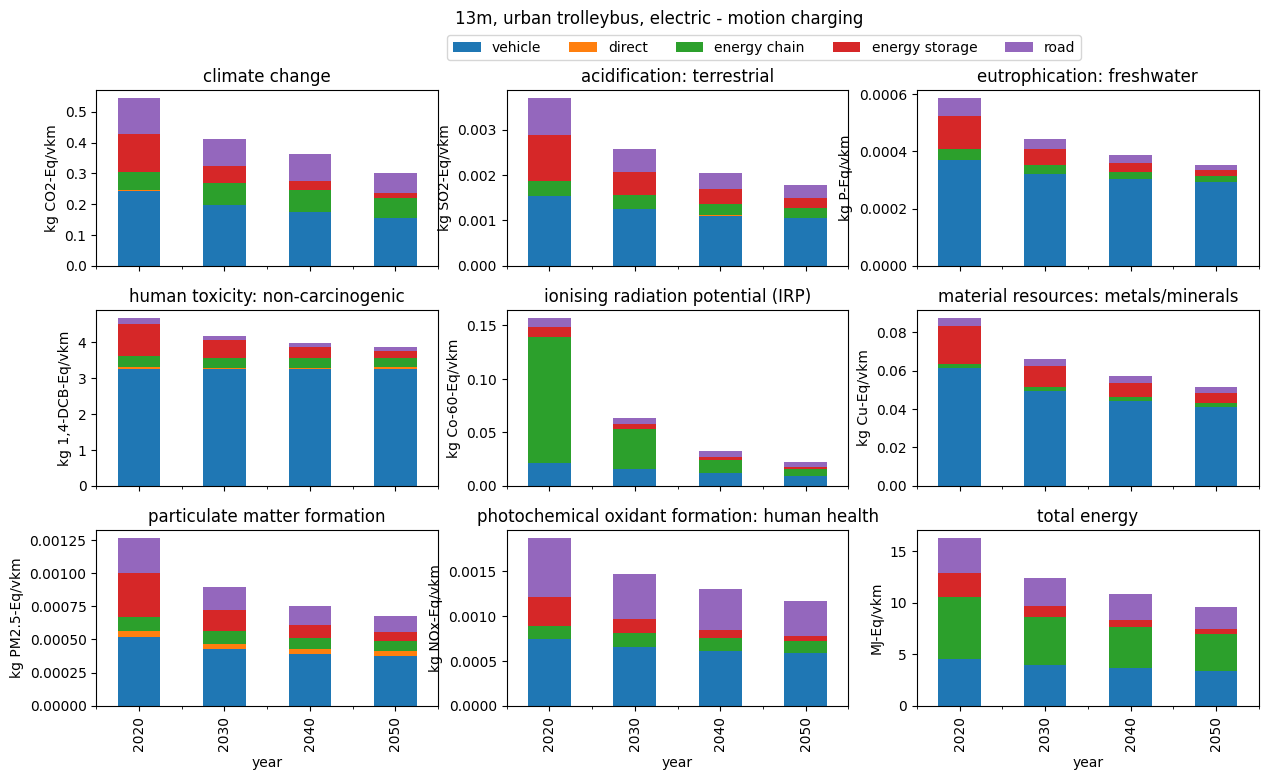

In [15]:
import matplotlib.pyplot as plt
import numpy as np

fig, axs = plt.subplots(figsize=(15, 8), 
                        sharex=True,
                        nrows=3, ncols=3,
                        gridspec_kw=dict(hspace=0.25)
                       ) 


targets = zip([x for x in df_full["impact_category"].unique()], axs.flatten())

for i, (key, ax) in enumerate(targets):
    df = res.sel(impact_category=key,
            size="18t",
                 year=[2020, 2030, 2040, 2050],
                powertrain="BEV",
            value=0).to_dataframe("val").unstack()["val"]
    
    df["vehicle"] = df[["powertrain", "glider", "EoL", "maintenance"]].sum(axis=1)
    df["direct"] = df[["direct - exhaust", "direct - non-exhaust"]].sum(axis=1)
    
    df = df[["vehicle", "direct", "energy chain", "energy storage", "road"]]
    
    df.plot(ax=ax, kind="bar", stacked=True)

    ax.set_title(key)
    ax.set_ylabel(ic.impact_categories[key]["unit"] + "/" + ic.func_unit)
    ax.legend().remove()
    
plt.legend(ncol=6, bbox_to_anchor=(0.5, 3.85))   
plt.tight_layout(pad=1.5)
plt.suptitle("13m, urban trolleybus, electric - motion charging")
plt.show()

In [4]:
ic.export_lci(format="file")

Extracted 1 worksheets in 0.83 seconds


0% [##############################] 100% | ETA: 00:00:00 | Item ID: 2613
Total time elapsed: 00:00:00
0% [##############################] 100% | ETA: 00:00:00 | Item ID: 2613
Total time elapsed: 00:00:00
0% [##############################] 100% | ETA: 00:00:00 | Item ID: 2615
Total time elapsed: 00:00:00
0% [##############################] 100% | ETA: 00:00:00 | Item ID: 2615
Total time elapsed: 00:00:00
0% [##############################] 100% | ETA: 00:00:00 | Item ID: 2615
Total time elapsed: 00:00:00
0% [##############################] 100% | ETA: 00:00:00 | Item ID: 2615
Total time elapsed: 00:00:00


'/Users/romain/GitHub/carculator_truck/dev/carculator_lci_truck_20240117_2050_bw2.xlsx'